Simulating circuits using Qiskit Aer.

Qiskit Aer is the qiskit package for simulating quantum circuits. 
It provides many different backends for doing a simulation. 
There is also a basic, Python only, implementation called BasicAer in Terra that can be used as a drop-in replacement for Aer in the examples below.
Statevector backend.

The most common backend in Qiskit Aer is the **statevector_simulator**. This simulator returns the quantum state, which is a complex vector of dimensions 2n, where n is the number of qubits (so be careful using this as it will quickly get too large to run on your machine).

To run the above circuit using the statevector simulator, first you need to import Aer and then set the backend to statevector_simulator.

Site location: https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html

In [1]:
# Prep work for statevector simulator
import numpy as np
from qiskit import *
%matplotlib inline

C:\Users\jpc_s\Anaconda37\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\jpc_s\Anaconda37\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=Tru

In [2]:
# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)  # circ is the variable chosen for this circuit

In [3]:
# Add a H gate on qubit 0, putting this qubit in superposition.
circ.h(0)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 1, putting
# the qubits in a Bell state.
circ.cx(0, 1)
# Add a CX (CNOT) gate on control qubit 0 and target qubit 2, putting
# the qubits in a GHZ state.
circ.cx(0, 2)

Visualize Circuit

You can visualize your circuit using Qiskit QuantumCircuit.draw(), which plots the circuit in the form found in many textbooks.

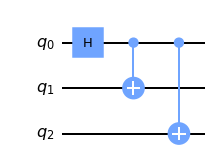

In [4]:
circ.draw('mpl')

In the above circuit, the qubits are put in order, with qubit zero at the top and qubit two at the bottom. 
The circuit is read left to right (meaning that gates that are applied earlier in the circuit show up further to the left).

Simulating circuits using Qiskit Aer.

Qiskit Aer is our package for simulating quantum circuits. It provides many different backends for doing a simulation. There is also a basic, Python only, implementation called BasicAer in Terra that can be used as a drop-in replacement for Aer in the examples below.

Statevector backend.

In [16]:
# Import Aer
from qiskit import Aer

# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')

In Qiskit we provide the execute function; the execute finction returns a job object that encapsulates information about the job submitted to the backend.

In [17]:
# Create a Quantum Program for execution
job = execute(circ, backend)

In [18]:
result = job.result()

In [19]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.70710678+0.j 0.        +0.j 0.        +0.j 0.        +0.j
 0.        +0.j 0.        +0.j 0.        +0.j 0.70710678+0.j]


In [38]:
import math

In [40]:
1/math.sqrt(2)

0.7071067811865475

Qiskit also provides a visualization toolbox to allow you to view these results.

Below, we use the visualization function to plot the real and imaginary components of the state density matrix ρ.

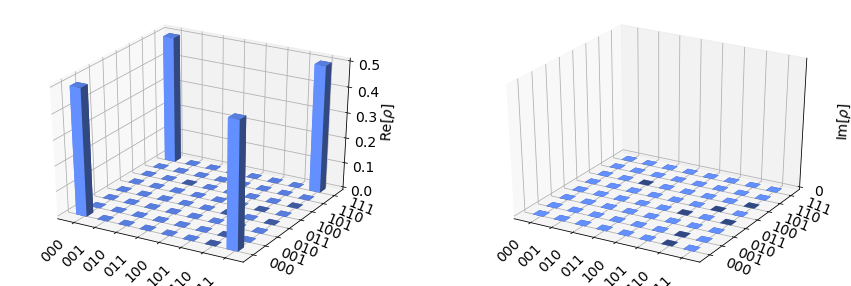

In [20]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

## Unitary backend (Simulator).

Qiskit Aer also includes a unitary_simulator that works provided all the elements in the circuit are unitary operations. This backend calculates the 2n × 2n matrix representing the gates in the quantum circuit.

In [21]:
# Run the quantum circuit on a unitary simulator backend
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
print(result.get_unitary(circ, decimals=3))

[[ 0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j  0.70710678-8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.70710678+0.00000000e+00j -0.70710678+8.65956056e-17j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.     

## OpenQASM backend.

The simulators above are useful because they provide information about the state output by the ideal circuit and the matrix representation of the circuit. However, a real experiment terminates by measuring each qubit (usually in the computational |0⟩,|1⟩ basis). Without measurement, we cannot gain information about the state. Measurements cause the quantum system to collapse into classical bits.

For example, suppose we make independent measurements on each qubit of the three-qubit GHZ state
|ψ⟩=(|000⟩+|111⟩)/2–√, and let xyz denote the bitstring that results. Recall that, under the qubit labeling used by Qiskit, x would correspond to the outcome on qubit 2, y to the outcome on qubit 1, and z to the outcome on qubit 0.

Recall the probability of obtaining outcome xyz is given by

Pr(xyz)=|⟨xyz|ψ⟩|^2 and as such for the GHZ state probability of obtaining 000 or 111 are both 1/2.

To simulate a circuit that includes measurement, we need to add measurements to the original circuit above, 
and use a different Aer backend.

In [22]:
# Create a Quantum Circuit
meas = QuantumCircuit(3, 3)
meas.barrier(range(3))
# map the quantum measurement to the classical bits
meas.measure(range(3), range(3))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ + meas

#drawing the circuit
qc.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├──■────■───░─┤M├──────
     └───┘┌─┴─┐  │   ░ └╥┘┌─┐   
q_1: ─────┤ X ├──┼───░──╫─┤M├───
          └───┘┌─┴─┐ ░  ║ └╥┘┌─┐
q_2: ──────────┤ X ├─░──╫──╫─┤M├
               └───┘ ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

This circuit adds a classical register, and three measurements that are used to map the outcome of qubits to the classical bits.

To simulate this circuit, we use the **qasm_simulator** in Qiskit Aer. 

Each run of this circuit will yield either the bitstring 000 or 111. 
To build up statistics about the distribution of the bitstrings (to, e.g., estimate Pr(000)), 
we need to repeat the circuit many times. 

The number of times the circuit is repeated can be specified in the execute function, via the shots keyword.

In [26]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=256)

# Grab the results from the job.
result_sim = job_sim.result()

In [27]:
## With the result object, you access the counts via the function get_counts(circuit). 
## This gives you the aggregated binary outcomes of the circuit you submitted.
counts = result_sim.get_counts(qc)
print(counts)

{'000': 120, '111': 136}


Qiskit also provides a function plot_histogram, which allows you to view the outcomes.

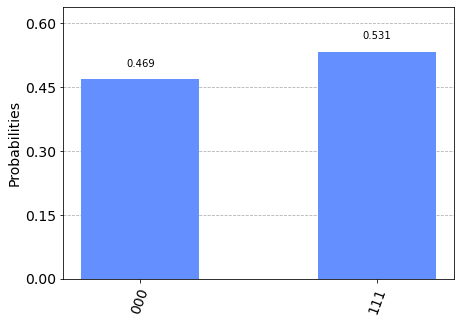

In [29]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

The estimated outcome probabilities Pr(000) and Pr(111) are computed by taking the aggregate counts and dividing by the number of shots (times the circuit was repeated). Try changing the shots keyword in the execute function and see how the estimated probabilities change.

In [30]:
# Copywright Information
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright